# Lutte contre la criminalité organisée Algorithme de détection de faux billets

*Etude data - Projet 6 - Nalron (décembre 2019) / ENSAE-ENSAI Formation Continue*


---

## Modélisation des données à l'aide d'une Régression Logistique 
*Utilisation du package «scikit-learn»*

Dans cette dernière phase de l'analyse, il sera question d'élaborer un programme capable d'effectuer une prédiction sur un billet, c'est-à-dire de déterminer s'il s'agit d'un vrai ou d'un faux billet. Pour chaque billet, l'algorithme de classification donnera la probabilité que le billet soit vrai. Si cette probabilité est supérieure ou égale à 0.5, le billet sera considéré comme vrai. Dans le cas contraire, il sera considéré comme faux.

In [46]:
#Préparation des données
X = df_cls.copy()
X = X.iloc[:, 2:]
y = df_cls.iloc[:, 0]

In [47]:
#Séparation entre les données d'entrainement et les données test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

*Ici, l'ensemble de données est divisé en deux parties dans un rapport de 20/80. Cela signifie que 80% des données seront utilisées pour la formation des modèles et 20% pour les tests des modèles. Les données étant assez limitées, le choix des 20% pour les données de test est choisi.*

In [48]:
#Instanciation d'un modèle nommé lr
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
#Sauvegarde du modèle lr 
import pickle
with open('p6_03_dataset/model.pkl', 'wb') as f:
    my_pickler = pickle.Pickler(f)
    my_pickler.dump(lr)

### Vérification de la colinéarité des variables 
*A partir du VIF (Variance Inflation Factor), le facteur d'influence de la variable, nous pouvons avoir une idée des éventuels problèmes de colinéarité.*

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

reg_multi = smf.ols('diagonal ~ height_left + height_right + margin_low + margin_up + length', data=data).fit()
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[2.249831212995896,
 2.5637087947433383,
 2.172802257913994,
 1.625230529655228,
 2.463836435483428]

<span style="text-decoration: underline"> VIF < 10 il n'y aura pas d'influence liée à la colinéarité des variables</span>. *Si des variables colinéaires sont de facto fortement corrélées entre elles, deux variables corrélées ne sont pas forcément colinéaires. La régression logistique peut-être modélisée sur nos six variables explicatives, il ne semble pas avoir de frein possible, ni colinéarité, il n'y a non plus pas de valeur atypique influente.*

### Évaluation du modèle à l'aide de la matrice de confusion.
Une matrice de confusion est un tableau utilisé pour évaluer les performances d'un modèle de classification. A l'aide de cette matrice il sera simple et rapide d'appréhender la pertinence du modèle élaboré. Le principe fondamental d'une matrice de confusion est le nombre de prédictions correctes et incorrectes qui sont résumées par classe.

In [51]:
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix) 

[[12  1]
 [ 0 21]]


*Les coefficients sur la diagonale indiquent les éléments bien classés, les coefficients en dehors indiquent ceux que le classifieur a mis dans la mauvaise classe.*

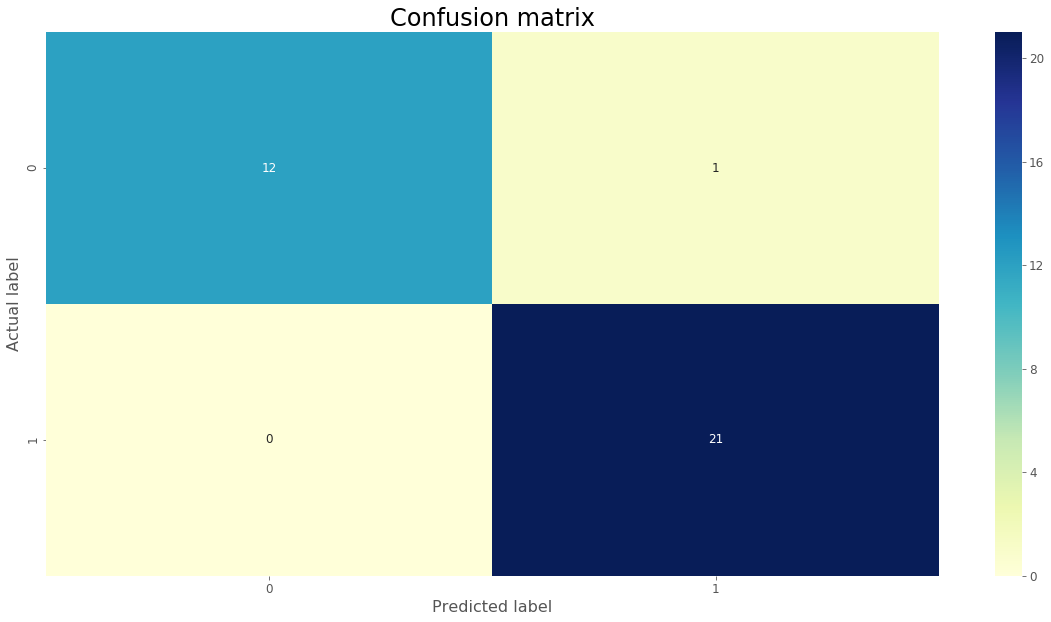

In [52]:
#Représentation graphique de la Matrice de confusion
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.savefig("p6_graphic/confusion_matrix.png")
plt.show()

### L'évaluation du modèle peut aussi se faire par la courbe ROC et sa métrique AUC.
*La courbe ROC (Receiver Operating Characteristic) représente la sensibilité en fonction de la spécificité pour différents seuils de décision. L'aire sous la courbe ROC, l'AUC (Area Under the ROC ), est une mesure de la qualité de la classification qui varie entre 0.5 dans le pire des cas et 1 dans le meilleur des cas.*

In [53]:
#Récupération de la prédiction de la valeur positive
y_prob = lr.predict_proba(X_test)[:,1] 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)

In [54]:
#Mesure AUC (Area Under the Curve): Aire sous la courbe
from sklearn import metrics
metrics.auc(false_positive_rate, true_positive_rate)

0.9963369963369964

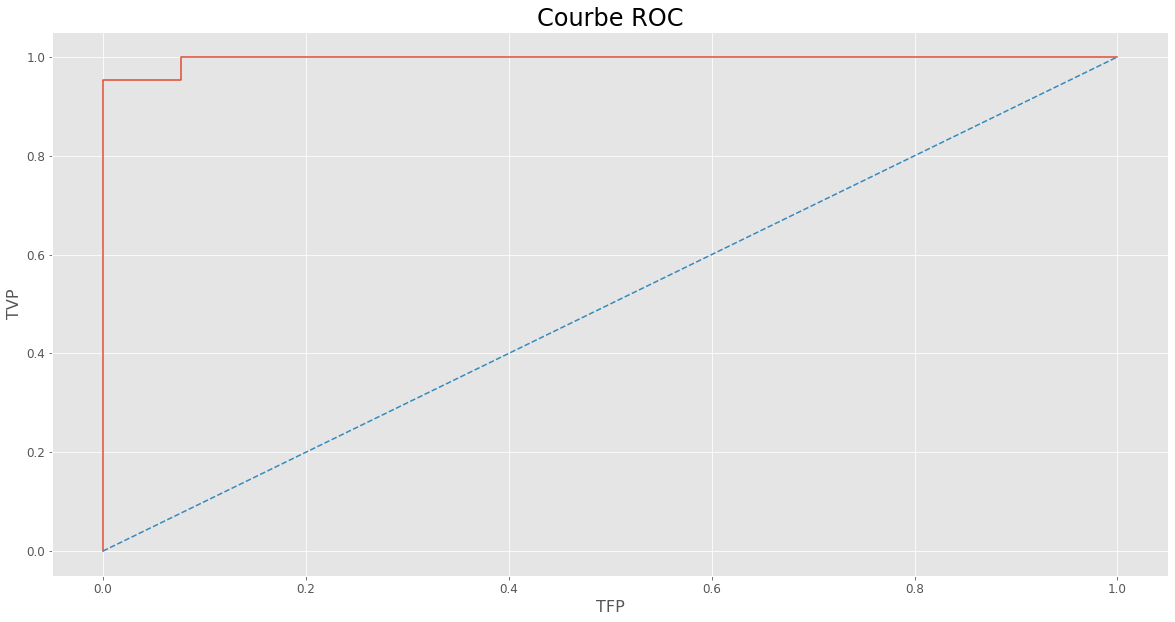

In [64]:
#Courbe ROC
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('TFP')
plt.ylabel('TVP')
plt.title('Courbe ROC')

plt.savefig("p6_graphic/courbe_roc.png")
plt.show()

*L’idée de la courbe ROC est de faire varier le «seuil» de 1 à 0 et, pour chaque cas, calculer le taux de vrai positif et de faux positif que l’on reporte dans un graphique: en abscisse le TFP, en ordonnée le TVP.*

*Facile à interpréter, ne nécessite pas de mise à l'échelle, ni de calcul complexe. La régression logistique fournit un score de probabilité pour les observations.* **Dans ce cas précis, nous sommes très proche du classifieur optimal.**

In [56]:
#Autres métriques d'évaluation du modèle 
print('  - Accuracy:' +str(round(metrics.accuracy_score(y_test, y_pred)*100, 2)), '%')
print('  - Precision:' +str(round(metrics.precision_score(y_test, y_pred)*100, 2)), '%')
print('  - Recall:' +str(round(metrics.recall_score(y_test, y_pred)*100, 2)), '%')
print('  - F1 score:' +str(round(metrics.f1_score(y_test, y_pred)*100, 2)), '%')

  - Accuracy:97.06 %
  - Precision:95.45 %
  - Recall:100.0 %
  - F1 score:97.67 %


*En conclusion, les métriques d'évaluation que nous obtenons sont très satisfaisantes. Après l'évaluation des performances du modèle de prédiction 'lr', ce modèle est retenu pour sa fiablité et sa performance.* 

---

## Application sur le fichier test_exemple.csv

Le modèle 'lr' étant validé, des prédictions peuvent-être menées sur d'autres jeux de données, essayons avec le second fichier que nous avons à disposition.

In [57]:
#Prédiction faite à partir du fichier "test_example.csv"
df0 = pd.read_csv('p6_data/test_example.csv')
df0

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [58]:
#Préparation des données
X = df0.copy()
X = X.iloc[:, :-1]

In [59]:
#Utilisation du modèle de prédiction 'lr'
probability = lr.predict_proba(X.values)[:, 1]

In [60]:
#Probabilités des billets établies 
proba = pd.Series(probability.round(3), name='value')

In [61]:
#Intégration des probabilités dans le jeu de données
df0_final = pd.concat([df0, proba], axis=1)
df0_final

,diagonal,height_left,height_right,margin_low,margin_up,length,id,value
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,0.057
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0.024
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,0.029
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,0.876
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,0.996


**Dataframe final avec résultats des classifications:**\
Pour chaque billet, l'algorithme de classification donnera la probabilité que le billet soit vrai. Si cette probabilité est supérieure ou égale à 0.5, le billet sera considéré comme vrai. Dans le cas contraire, il sera considéré comme faux.

In [62]:
#Résultats de la classification prédictive :
resultat = []
for i in df0_final['value'] >= .5:
    if i is True :
        resultat.append('Vrai Billet')
    else :
        resultat.append('Faux Billet')

df0_final['resultat'] = resultat
df0_final

,diagonal,height_left,height_right,margin_low,margin_up,length,id,value,resultat
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,0.057,Faux Billet
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0.024,Faux Billet
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,0.029,Faux Billet
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,0.876,Vrai Billet
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,0.996,Vrai Billet


<span style="font-weight: bold; text-decoration: underline">>>> L'algorithme de classification a été mis à disposition des services concernés.</span>

[Retour vers la page notebook précédente, clustering par apprentissage non supervisé KMeans](https://github.com/nalron/project_counterfeit_banknote/blob/french_version/p6_notebook03.ipynb)

[Suite vers le notebook de l'algorithme de classification](https://github.com/nalron/project_counterfeit_banknote/blob/french_version/algorithme_classification.ipynb)